In [2]:
import pandas as pd
import os,sys
print (os.getcwd())

# pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

train_data = pd.read_csv("../../CreditCard/all/cs-training.csv")
train_data.rename(columns=({'Unnamed: 0': 'Id'}), inplace=True)
# print train_data['MonthlyIncome'].describe()
# print train_data.describe()

null_df = train_data[train_data.isnull().values==True]

null_df = train_data.count()
print (train_data.count())

colnull = pd.DataFrame(data={'colname':null_df.index, 'isnulls':null_df.values})
colnames = colnull.loc[colnull.isnulls==True,'colname']
print (train_data.var())
print (train_data.mean())
train_data = train_data.drop_duplicates()

C:\Users\honglin.wang\PycharmProjects\ML\venv\Scripts


Id                                      150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64
Id                                      1.875012e+09
SeriousDlqin2yrs                        6.237283e-02
RevolvingUtilizationOfUnsecuredLines    6.237775e+04
age                                     2.182080e+02
NumberOfTime30-59DaysPastDueNotWorse    1.757941e+01
DebtRatio                               4.152704e+06
MonthlyIncome                           2.069189e+08
NumberOfOpenCreditLinesAndLoans         2.648081e+01

In [3]:

# fit value for MonthlyIncome feature
process_df = train_data.iloc[:,[6,1,2,3,4,5,7,8,9,10]]
known = process_df[process_df.MonthlyIncome.notnull()].as_matrix()
unknown = process_df[process_df.MonthlyIncome.isnull()].as_matrix()
print (known)
print (len(unknown))
X = known[:,1:]
y = known[:,0]

# start to fill field MonthlyIncome null value with random forest predicted results
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,mean_squared_error
rfr = RandomForestRegressor(n_estimators=200,max_depth=5,random_state=0,n_jobs=-1)
rfr.fit(X,y)
predicted = rfr.predict(unknown[:,1:]).round(0)
print (predicted)
print '%s  %s' %(predicted.ndim,predicted.size)

mse = mean_squared_error(y,rfr.predict(X))
print (mse)
# print (process_df.loc[process_df.MonthlyIncome.isnull(),'MonthlyIncome'])
process_df.loc[process_df.MonthlyIncome.isnull(),'MonthlyIncome'] = predicted


c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[9.12000000e+03 1.00000000e+00 7.66126609e-01 ... 0.00000000e+00
  6.00000000e+00 0.00000000e+00]
 [2.60000000e+03 0.00000000e+00 9.57151019e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.04200000e+03 0.00000000e+00 6.58180140e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.58400000e+03 0.00000000e+00 2.99745148e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.71600000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15800000e+03 0.00000000e+00 8.50282951e-01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]]
29731


[4748.   56. 4580. ...  276. 1235. 1235.]
1  29731


79699604.70338058


c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:

import matplotlib.pyplot as plt

print (process_df['NumberOfTimes90DaysLate'].describe())
fig,ax = plt.subplots(figsize = (8,5) , dpi = 80)
process_df_head = process_df.head(1000)
ax.plot(process_df_head["MonthlyIncome"]/10000 , process_df_head["NumberOfTimes90DaysLate"])
ax.set(xlabel = "MonthlyIncome" , ylabel = "NumberOfTimes90DaysLate" ,title = "Income_NumberOfTimes90DaysLate")
plt.show()


count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64


<Figure size 640x400 with 1 Axes>

['MonthlyIncome', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
38227
   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0  

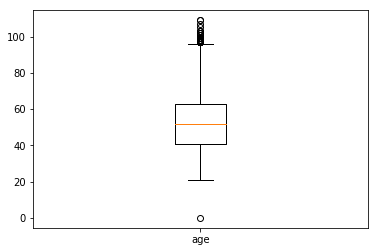

In [6]:

import matplotlib.pyplot as plt

print (process_df.columns.values.tolist())
columns = process_df.columns.values.tolist()

age = process_df['age']
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.boxplot([age])
ax.set_xticklabels(['age'])

invalids= process_df[(process_df['age']>100) 
                          | (process_df['age'] <= 0) 
                          | (process_df['RevolvingUtilizationOfUnsecuredLines'] >= 1) 
                          | (process_df['DebtRatio'] >= 1)
                          | (process_df['NumberOfTime30-59DaysPastDueNotWorse'] > 95) 
                          | (process_df['NumberOfTime60-89DaysPastDueNotWorse'] > 95) 
                          | (process_df['NumberOfTimes90DaysLate'] > 95)].index
print (len(invalids))
removed_df = process_df.drop(invalids,axis=0)
print (removed_df.head())


In [7]:
import matplotlib.pyplot as plt
grouped = removed_df['SeriousDlqin2yrs'].groupby(removed_df['SeriousDlqin2yrs']).count()
print (float(grouped[1])/grouped[0])
print (grouped)

0.06324911533046687
SeriousDlqin2yrs
0    105124
1      6649
Name: SeriousDlqin2yrs, dtype: int64


   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0                                     0
2         3042.0                 0                              0.658180   38                                     1   0.085113                                2                        1                             0                           

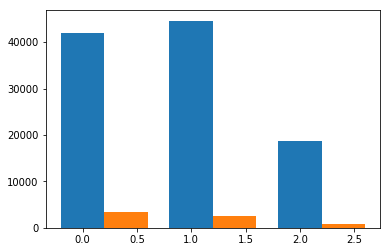

In [8]:

import matplotlib.pyplot as plt

# monthlyIncome and bad ratio correlation
print (removed_df.head())
grouped = removed_df['MonthlyIncome'].groupby(removed_df['MonthlyIncome']).count()

# plt.plot(grouped.index, grouped.values,"-", color = "r")
# plt.show()
print (grouped.index.tolist()[1:100])
incomes = grouped.index.tolist()
bad_users = []
good_users = []
bad_users_5k = 0
good_users_5k = 0 
bad_users_10k = 0
good_users_10k = 0 
bad_users_other = 0
good_users_other = 0 
for income in incomes:
    if income < 5000:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_5k += bad_user_cnt
        good_users_5k += (grouped[income] - bad_user_cnt)
    elif income < 10000:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_10k += bad_user_cnt
        good_users_10k += (grouped[income] - bad_user_cnt)
    else:
        bad_user_cnt = len(removed_df[(removed_df['MonthlyIncome'] == income) & (removed_df['SeriousDlqin2yrs'] == 1)])
        bad_users_other += bad_user_cnt
        good_users_other += (grouped[income] - bad_user_cnt)

good_num_list = [good_users_5k,good_users_10k,good_users_other]
bad_num_list = [bad_users_5k,bad_users_10k,bad_users_other]

x = list(range(len(bad_num_list)))
plt.bar(x,good_num_list,width=0.4)
for i in range(len(x)):
    x[i] = x[i] + 0.4
plt.bar(x,bad_num_list,width=0.4)
plt.show()



                                      MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
MonthlyIncome                              1.000000         -0.016319                             -0.031866  0.034161                              0.001567  -0.048272                         0.093975                -0.019692                      0.136240                             -0.009702
SeriousDlqin2yrs                          -0.016319          1.000000                              0.236780 -0.096731                              0.242944   0.060364                        -0.025901                 0.296840                     -0.012102                              0.237548
RevolvingUtilizationOfUnsecuredLines      -0.031866          0.236780                              1.000000 -0.259180    

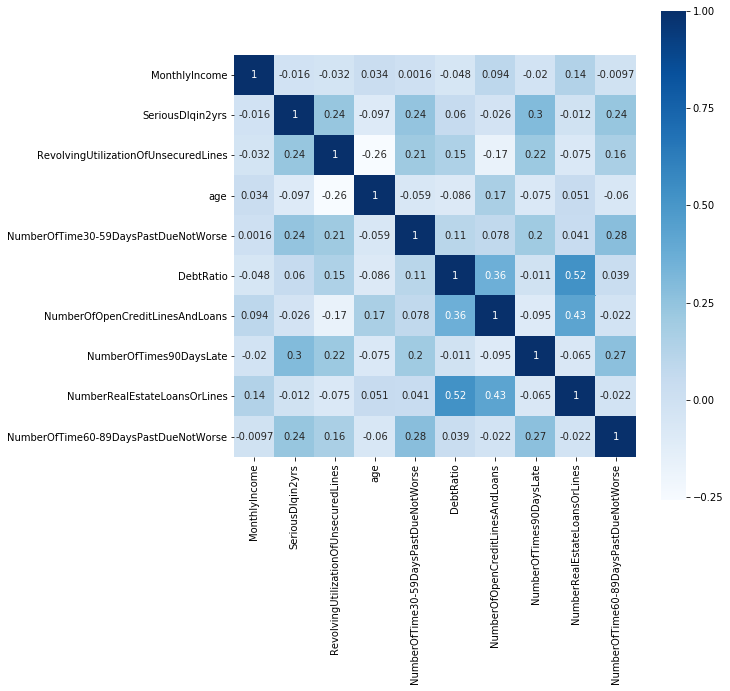

In [9]:

print (removed_df.corr())
import seaborn as sns

dfData = removed_df.corr()
plt.subplots(figsize=(9, 9)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
# plt.savefig('./BluesStateRelation.png')
plt.show()


In [10]:


# feanture selection :  to calculate the feature importance with random forest model
Y = removed_df['SeriousDlqin2yrs'].as_matrix()
cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
X = removed_df[cols].as_matrix()
print (X)
print (Y)
names = cols
print (names)
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True)

c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[9.12000000e+03 7.66126609e-01 4.50000000e+01 ... 0.00000000e+00
  6.00000000e+00 0.00000000e+00]
 [2.60000000e+03 9.57151019e-01 4.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.04200000e+03 6.58180140e-01 3.80000000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.58400000e+03 2.99745148e-01 4.40000000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.71600000e+03 0.00000000e+00 3.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15800000e+03 8.50282951e-01 6.40000000e+01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]]
[1 0 0 ... 0 0 0]
['MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']


Features sorted by their score:
[(0.214, 'DebtRatio'), (0.1904, 'RevolvingUtilizationOfUnsecuredLines'), (0.1894, 'MonthlyIncome'), (0.124, 'age'), (0.1089, 'NumberOfTimes90DaysLate'), (0.0854, 'NumberOfOpenCreditLinesAndLoans'), (0.033, 'NumberOfTime30-59DaysPastDueNotWorse'), (0.029, 'NumberRealEstateLoansOrLines'), (0.0259, 'NumberOfTime60-89DaysPastDueNotWorse')]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from collections import defaultdict
import numpy as np

# feanture selection :  to calculate the feature importance with random forest model 
#  Mean decrease accuracy
Y = removed_df['SeriousDlqin2yrs'].as_matrix()
cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
X = removed_df[cols].as_matrix()
print (X)
print (Y)
# names = cols
# print (names)
rf = RandomForestRegressor()
scores = defaultdict(list)

#crossvalidate the scores on a number of different random splits of the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=0)

r = rf.fit(X_train, Y_train)
acc = r2_score(Y_test, rf.predict(X_test))
for i in range(X.shape[1]):
    X_t = X_test.copy()
    np.random.shuffle(X_t[:, i])
    shuff_acc = r2_score(Y_test, rf.predict(X_t))
    scores[names[i]].append((acc-shuff_acc)/acc)
print "Features sorted by their score:"
print sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True)




c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


[[9.12000000e+03 7.66126609e-01 4.50000000e+01 ... 0.00000000e+00
  6.00000000e+00 0.00000000e+00]
 [2.60000000e+03 9.57151019e-01 4.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.04200000e+03 6.58180140e-01 3.80000000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.58400000e+03 2.99745148e-01 4.40000000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.71600000e+03 0.00000000e+00 3.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15800000e+03 8.50282951e-01 6.40000000e+01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]]
[1 0 0 ... 0 0 0]


Features sorted by their score:
[(2.7176, 'NumberOfTimes90DaysLate'), (1.5224, 'NumberOfOpenCreditLinesAndLoans'), (1.5148, 'RevolvingUtilizationOfUnsecuredLines'), (1.4673, 'DebtRatio'), (1.4254, 'MonthlyIncome'), (1.249, 'NumberOfTime30-59DaysPastDueNotWorse'), (1.0742, 'age'), (0.8979, 'NumberOfTime60-89DaysPastDueNotWorse'), (0.5508, 'NumberRealEstateLoansOrLines')]


In [13]:
"""

this cell tries different feature selection model.
freeze the codes as minepy is not installed successfully.
""" 


# from sklearn.linear_model import (LinearRegression, Ridge, 
#                                   Lasso, RandomizedLasso)
# from sklearn.feature_selection import RFE, f_regression
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# from minepy import MINE
# 
# # full picture feanture selection
# Y = removed_df['SeriousDlqin2yrs'].as_matrix()
# cols = [i for i in removed_df.columns if i not in ['SeriousDlqin2yrs']]
# X = removed_df[cols].as_matrix()
# print (X)
# print (Y)
# names = cols
# ranks = {}
# 
# def rank_to_dict(ranks, names, order=1):
#     minmax = MinMaxScaler()
#     ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#     ranks = map(lambda x: round(x, 2), ranks)
#     return dict(zip(names, ranks ))
# 
# lr = LinearRegression(normalize=True)
# lr.fit(X, Y)
# ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
# 
# ridge = Ridge(alpha=7)
# ridge.fit(X, Y)
# ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
# 
# 
# lasso = Lasso(alpha=.05)
# lasso.fit(X, Y)
# ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
# 
# 
# rlasso = RandomizedLasso(alpha=0.04)
# rlasso.fit(X, Y)
# ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
# 
# #stop the search when 5 features are left (they will get equal scores)
# rfe = RFE(lr, n_features_to_select=5)
# rfe.fit(X,Y)
# ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
# 
# rf = RandomForestRegressor()
# rf.fit(X,Y)
# ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
# 
# 
# f, pval  = f_regression(X, Y, center=True)
# ranks["Corr."] = rank_to_dict(f, names)
# 
# mine = MINE()
# mic_scores = []
# for i in range(X.shape[1]):
#     mine.compute_score(X[:,i], Y)
#     m = mine.mic()
#     mic_scores.append(m)
# 
# ranks["MIC"] = rank_to_dict(mic_scores, names)
# 
# 
# r = {}
# for name in names:
#     r[name] = round(np.mean([ranks[method][name] 
#                              for method in ranks.keys()]), 2)
# 
# methods = sorted(ranks.keys())
# ranks["Mean"] = r
# methods.append("Mean")
# 
# print "\t%s" % "\t".join(methods)
# for name in names:
#     print "%s\t%s" % (name, "\t".join(map(str, 
#                          [ranks[method][name] for method in methods])))
#     
print ()

()


[[   23    55   847]
 [   28   489  3956]
 [   35  1013 10319]
 [   43  1391 16559]
 [   53  1934 26069]
 [   56   439  7465]
 [   62   655 14222]
 [   67   318  9824]
 [   99   355 15863]]
  variable interval  flag_0  flag_1
0      age     0,23     847      55
1      age    23,28    3956     489
2      age    28,35   10319    1013
3      age    35,43   16559    1391
4      age    43,53   26069    1934
5      age    53,56    7465     439
6      age    56,62   14222     655
7      age    62,67    9824     318
8      age      67+   15863     355


   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines       age  NumberOfTime30-59DaysPastDueNotWorse  NumberOfTimes90DaysLate  NumberOfTime60-89DaysPastDueNotWorse  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines
0                 1                              1.201473  0.203720                              1.669700                -0.342514                             -0.239287      -0.358279                        -0.139830                      0.435068
1                 0                              1.201473  0.313794                             -0.466545                -0.342514                             -0.239287       0.313706                         0.352828                      0.209763
2                 0                              0.363891  0.313794                              0.854895                 1.963681                             -0.239287       0.313706                         0.352828                      0.209763
3           

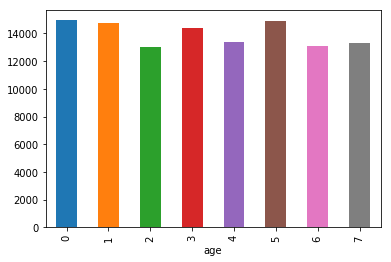

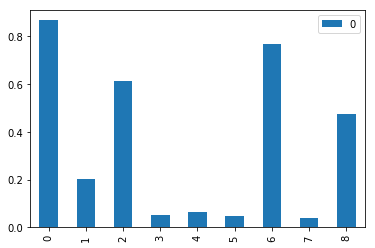

In [ ]:

# -*- coding: utf-8 -*-
def ChiMerge(df,variable,flag,confidenceVal=3.841,bin=10,sample=None):  
    '''
    K方检验对连续变量进行分箱函数
    param df:DataFrame| 必须包含标签列
    param variable:str| 需要卡方分箱的变量名称（字符串）
    param flag:str    | 正负样本标识的名称（字符串）
    param confidenceVal:float| 置信度水平（默认是不进行抽样95%）
    param bin：int            | 最多箱的数目
    param sample: int          | 为抽样的数目（默认是不进行抽样），因为如果观测值过多运行会较慢
    note: 停止条件为大于置信水平且小于bin的数目
    return :DataFrame|采样结果
    '''   
    
    
    #进行是否抽样操作
    if sample != None:
        df = df.sample(n=sample)
    else:
        df   
        
    #进行数据格式化录入
    total_num = df.groupby([variable])[flag].count()  #统计需分箱变量每个值数目
    total_num = pd.DataFrame({'total_num': total_num})  #创建一个数据框保存之前的结果
    positive_class = df.groupby([variable])[flag].sum()  #统计需分箱变量每个值正样本数
    positive_class = pd.DataFrame({'positive_class': positive_class})  #创建一个数据框保存之前的结果
    regroup = pd.merge(total_num, positive_class, left_index=True, right_index=True,
                       how='inner')  # 组合total_num与positive_class
    regroup.reset_index(inplace=True)
    regroup['negative_class'] = regroup['total_num'] - regroup['positive_class']  #统计需分箱变量每个值负样本数
    regroup = regroup.drop('total_num', axis=1)
    np_regroup = np.array(regroup)  #把数据框转化为numpy（提高运行效率）
    #print('已完成数据读入,正在计算数据初处理')

    #处理连续没有正样本或负样本的区间，并进行区间的合并（以免卡方值计算报错）
    i = 0
    while (i <= np_regroup.shape[0] - 2):
        if ((np_regroup[i, 1] == 0 and np_regroup[i + 1, 1] == 0) or ( np_regroup[i, 2] == 0 and np_regroup[i + 1, 2] == 0)):
            np_regroup[i, 1] = np_regroup[i, 1] + np_regroup[i + 1, 1]  # 正样本
            np_regroup[i, 2] = np_regroup[i, 2] + np_regroup[i + 1, 2]  # 负样本
            np_regroup[i, 0] = np_regroup[i + 1, 0]
            np_regroup = np.delete(np_regroup, i + 1, 0)
            i = i - 1
        i = i + 1
 
    #对相邻两个区间进行卡方值计算
    chi_table = np.array([])  # 创建一个数组保存相邻两个区间的卡方值
    for i in np.arange(np_regroup.shape[0] - 1):
        chi = (np_regroup[i, 1] * np_regroup[i + 1, 2] - np_regroup[i, 2] * np_regroup[i + 1, 1]) ** 2 \
          * (np_regroup[i, 1] + np_regroup[i, 2] + np_regroup[i + 1, 1] + np_regroup[i + 1, 2]) / \
          ((np_regroup[i, 1] + np_regroup[i, 2]) * (np_regroup[i + 1, 1] + np_regroup[i + 1, 2]) * (
          np_regroup[i, 1] + np_regroup[i + 1, 1]) * (np_regroup[i, 2] + np_regroup[i + 1, 2]))
        chi_table = np.append(chi_table, chi)
    #print('已完成数据初处理，正在进行卡方分箱核心操作')

    #把卡方值最小的两个区间进行合并（卡方分箱核心）
    while (1):
        if (len(chi_table) <= (bin - 1) and min(chi_table) >= confidenceVal):
            break
        chi_min_index = np.argwhere(chi_table == min(chi_table))[0]  # 找出卡方值最小的位置索引
        np_regroup[chi_min_index, 1] = np_regroup[chi_min_index, 1] + np_regroup[chi_min_index + 1, 1]
        np_regroup[chi_min_index, 2] = np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 2]
        np_regroup[chi_min_index, 0] = np_regroup[chi_min_index + 1, 0]
        np_regroup = np.delete(np_regroup, chi_min_index + 1, 0)

        if (chi_min_index == np_regroup.shape[0] - 1):  # 最小值试最后两个区间的时候
            # 计算合并后当前区间与前一个区间的卡方值并替换
            chi_table[chi_min_index - 1] = (np_regroup[chi_min_index - 1, 1] * np_regroup[chi_min_index, 2] - np_regroup[chi_min_index - 1, 2] * np_regroup[chi_min_index, 1]) ** 2 \
                                           * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) / \
                                       ((np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index, 1]) * (np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 2]))
            # 删除替换前的卡方值
            chi_table = np.delete(chi_table, chi_min_index, axis=0)

        else:
            # 计算合并后当前区间与前一个区间的卡方值并替换
            chi_table[chi_min_index - 1] = (np_regroup[chi_min_index - 1, 1] * np_regroup[chi_min_index, 2] - np_regroup[chi_min_index - 1, 2] * np_regroup[chi_min_index, 1]) ** 2 \
                                       * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) / \
                                       ((np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index - 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index - 1, 1] + np_regroup[chi_min_index, 1]) * (np_regroup[chi_min_index - 1, 2] + np_regroup[chi_min_index, 2]))
            # 计算合并后当前区间与后一个区间的卡方值并替换
            chi_table[chi_min_index] = (np_regroup[chi_min_index, 1] * np_regroup[chi_min_index + 1, 2] - np_regroup[chi_min_index, 2] * np_regroup[chi_min_index + 1, 1]) ** 2 \
                                       * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 1] + np_regroup[chi_min_index + 1, 2]) / \
                                   ((np_regroup[chi_min_index, 1] + np_regroup[chi_min_index, 2]) * (np_regroup[chi_min_index + 1, 1] + np_regroup[chi_min_index + 1, 2]) * (np_regroup[chi_min_index, 1] + np_regroup[chi_min_index + 1, 1]) * (np_regroup[chi_min_index, 2] + np_regroup[chi_min_index + 1, 2]))
            # 删除替换前的卡方值
            chi_table = np.delete(chi_table, chi_min_index + 1, axis=0)
    #print('已完成卡方分箱核心操作，正在保存结果')
    
    print (np_regroup)

    #把结果保存成一个数据框
    result_data = pd.DataFrame()  # 创建一个保存结果的数据框
    result_data['variable'] = [variable] * np_regroup.shape[0]  # 结果表第一列：变量名
    list_temp = []
    for i in np.arange(np_regroup.shape[0]):
        if i == 0:
            x = '0' + ',' + str(np_regroup[i, 0])
        elif i == np_regroup.shape[0] - 1:
            x = str(np_regroup[i - 1, 0]) + '+'
        else:
            x = str(np_regroup[i - 1, 0]) + ',' + str(np_regroup[i, 0])
        list_temp.append(x)
    result_data['interval'] = list_temp  #结果表第二列：区间
    result_data['flag_0'] = np_regroup[:, 2]  # 结果表第三列：负样本数目
    result_data['flag_1'] = np_regroup[:, 1]  # 结果表第四列：正样本数目

    return result_data


# split bins
cut1 = pd.qcut(removed_df['RevolvingUtilizationOfUnsecuredLines'],6,labels=False)
# split bins on field according to quantitle
cut2 = pd.qcut(removed_df['age'],8,labels=False)
age_cut = cut2.to_frame()
grp = age_cut['age'].groupby(age_cut['age']).count()
grp.plot('bar')

# split bins on field according to Chi Square Test
result_data = ChiMerge(df=removed_df,variable="age",flag="SeriousDlqin2yrs",confidenceVal=3.841,bin=10,sample=None)
print (result_data)
bins = [] #卡方的区间值
bins.append(-float('inf'))
for i in range(result_data["interval"].shape[0]-1):
    
    St = result_data["interval"][i].split(",")
    bins.append(float(St[1]))

bins.append(float('inf'))

cut3 = pd.cut(removed_df['NumberOfTime30-59DaysPastDueNotWorse'],[-1,0,1,3,5,13],labels=False)
cut4 = pd.qcut(removed_df['DebtRatio'],3,labels=False)
cut5 = pd.qcut(removed_df['MonthlyIncome'],4,labels=False)
cut6 = pd.qcut(removed_df['NumberOfOpenCreditLinesAndLoans'],6,labels=False)
cut7 = pd.cut(removed_df['NumberOfTimes90DaysLate'],[-1,0,1,3,5,20],labels=False)
cut8 = pd.cut(removed_df['NumberRealEstateLoansOrLines'],[-1,0,2,3,33],labels=False)
cut9 = pd.cut(removed_df['NumberOfTime60-89DaysPastDueNotWorse'],[-1,0,1,3,12],labels=False)


# calculate WOE value
def calc_woe_value(cut):
    global_pos_sample_cnt = sum(removed_df['SeriousDlqin2yrs'])
    global_neg_sample_cnt = len(removed_df) - global_pos_sample_cnt
    group = removed_df['SeriousDlqin2yrs'].groupby(cut,as_index=True).value_counts()
    pos_rate = (pd.DataFrame(group).unstack().iloc[:,1])/global_pos_sample_cnt
    neg_rate = (pd.DataFrame(group).unstack().iloc[:,0]/global_neg_sample_cnt)
    woe = np.log(pos_rate/neg_rate)
    iv = sum(woe * (pos_rate - neg_rate))
    return iv, woe

iv1,cut1_woe = calc_woe_value(cut1)
iv2,cut2_woe = calc_woe_value(cut2)
iv3,cut3_woe = calc_woe_value(cut3)
iv4,cut4_woe = calc_woe_value(cut4)
iv5,cut5_woe = calc_woe_value(cut5)
iv6,cut6_woe = calc_woe_value(cut6)
iv7,cut7_woe = calc_woe_value(cut7)
iv8,cut8_woe = calc_woe_value(cut8)
iv9,cut9_woe = calc_woe_value(cut9)

ivs = [iv1,iv2,iv3,iv4,iv5,iv6,iv7,iv8,iv9]
deleted_ivs = []
# deleted features whose IV value is less then 0.2
for i in range(len(ivs)):
    if ivs[i] < 0.2 :
        deleted_ivs.append(i)
pd.DataFrame(ivs).plot(kind='bar')

def replace_with_woe(cut,cut_woe):
    cut_bins = []
    for value in cut.unique():
        cut_bins.append(value)
    cut_bins.sort()
    for i in range(len(cut_bins)):
        cut.replace(cut_bins[i],cut_woe[i],inplace=True)

    return cut

# only keep the following features

# to do backup
model_input_df = pd.DataFrame()
model_input_df['SeriousDlqin2yrs'] = removed_df['SeriousDlqin2yrs']
model_input_df['RevolvingUtilizationOfUnsecuredLines'] = replace_with_woe(cut1,cut1_woe)
model_input_df['age'] = replace_with_woe(cut2,cut2_woe)
model_input_df['NumberOfTime30-59DaysPastDueNotWorse'] = replace_with_woe(cut3,cut3_woe)
model_input_df['NumberOfTimes90DaysLate'] = replace_with_woe(cut7,cut7_woe)
model_input_df['NumberOfTime60-89DaysPastDueNotWorse'] = replace_with_woe(cut9,cut9_woe)
model_input_df['MonthlyIncome'] = replace_with_woe(cut5,cut5_woe)
model_input_df['NumberOfOpenCreditLinesAndLoans'] = replace_with_woe(cut6,cut6_woe)
model_input_df['NumberRealEstateLoansOrLines'] = replace_with_woe(cut8,cut8_woe)



print (model_input_df.head())



In [ ]:
# -*- coding: utf-8 -*-  
'''
this cell is to build model with logistic regression 
'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,accuracy_score,recall_score,f1_score,precision_score
import scipy


X = removed_df.iloc[:,1:]
Y = removed_df.iloc[:,0]
X = model_input_df.iloc[:,1:]
Y = model_input_df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)
print removed_df.head()

# build model
model = LogisticRegression()
lr = model.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# evaluate prediction results
print  accuracy_score(y_test,y_pred)
print  recall_score(y_test,y_pred)
print  precision_score(y_test,y_pred)

#画ROC曲线和计算AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc =  roc_auc_score(y_test,y_pred)  

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


   MonthlyIncome  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse
0         9120.0                 1                              0.766127   45                                     2   0.802982                               13                        0                             6                                     0
1         2600.0                 0                              0.957151   40                                     0   0.121876                                4                        0                             0                                     0
2         3042.0                 0                              0.658180   38                                     1   0.085113                                2                        1                             0                           

c:\users\honglin.wang\pycharmprojects\ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
